**Author**: Martin Gamboa 

**Github**: mmgamboa

**Date**: January 10th, 2025

# Problem

What does high correlation of returns imply for long-term behavior of two assets prices? Analyze some examples to support your answer. You can get price data from yahoo finance.


In [18]:
# Load basic packages
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Load specific packages
import yfinance as yf

# Load mymodule
import sys
sys.path.append('..')
from mymodule import *

## Explanation
_Get data_

* Get the data from external source using Yahoo Finance,

_Trends_

* Define Return computation for individual data and dataset. We will use log return for continuous compounding and 'Adj Close' column. This election is because we account for stock, dividends, and other corporate actions, providing a more accurate representation of the stock's performance over time,

* We plot using `plotly` and with dynamic box showing simultaneously the return for all the companies considered for this analysis. I did it twice: one step-by-step developing my own functions and another using built-in methods from `Pandas` (see _Same using built-in methods_ sub-section).

# Get data

In [20]:
# Download data for the past year
# We use period="1y" and interval="1d" to get the data for the past year with daily frequency because we are 
# interested in long-term investment

companies_name = ["MELI", #MercadoLibre
                "MSFT", #Microsoft
                "AAPL", #Apple
                "HPQ"]  #HP
             
get_data = yf.download(companies_name, period="1y", interval="1d")   

[*********************100%***********************]  4 of 4 completed


In [21]:
# Get date using .index
dates = get_data.index
dates = [d.strftime('%Y-%m-%d') for d in dates]

Save data in file if needed (Pandas)

In [22]:
# Save to CSV (optional)
to_save = False
if to_save:
    save_data = get_data.copy()
    save_data.to_csv("stock_prices_last_year.csv")


# Trends

In [23]:
param_to_analyze = 'Adj Close'

returns_of_companies = compute_daily_return(get_data[param_to_analyze], companies_name )

In [24]:
# Plot return for each company
fig = px.line(returns_of_companies, 
              x=returns_of_companies.index, 
              y=returns_of_companies.columns, 
              title='Daily return of companies')
# For each x-value show all the y-values simultaneously in the dynamic box
fig.update_traces(hoverinfo='y')
fig.update_layout(hovermode = "x unified")
# Change y-axis name
fig.update_yaxes(title_text="Return")
# Show the plot
fig.show()

### Same using built-in methods

In [25]:
# Compute pct_change for all the companies simultaneously
for ilabel in companies_name:
    get_data[(param_to_analyze, ilabel + ' Daily Return')] = get_data[(param_to_analyze, ilabel)].pct_change()
    # Alternatively, calculate log returns
    get_data[(param_to_analyze, ilabel + ' Log Return')] = np.log(get_data[(param_to_analyze, ilabel)] / get_data[(param_to_analyze, ilabel)].shift(1))

print(get_data[(param_to_analyze, 'AAPL Log Return')])
# Plot the daily return
fig = px.line(get_data, x=get_data.index, 
              y=[get_data[(param_to_analyze, ilabel + ' Log Return')].values for ilabel in companies_name], 
              title='Log return of companies')
fig.update_traces(hoverinfo='y')
fig.update_layout(hovermode = "x unified")
fig.update_yaxes(title_text="Return")
fig.show()

Date
2024-01-16         NaN
2024-01-17   -0.005187
2024-01-18    0.032052
2024-01-19    0.015414
2024-01-22    0.012090
                ...   
2025-01-07   -0.011453
2025-01-08    0.002021
2025-01-10   -0.024399
2025-01-13   -0.010398
2025-01-14   -0.001665
Name: (Adj Close, AAPL Log Return), Length: 251, dtype: float64


# Correlation computation

          MELI      MSFT      AAPL       HPQ
MELI  1.000000  0.179494  0.163003  0.101436
MSFT  0.179494  1.000000  0.476223  0.177248
AAPL  0.163003  0.476223  1.000000  0.213696
HPQ   0.101436  0.177248  0.213696  1.000000


<Axes: >

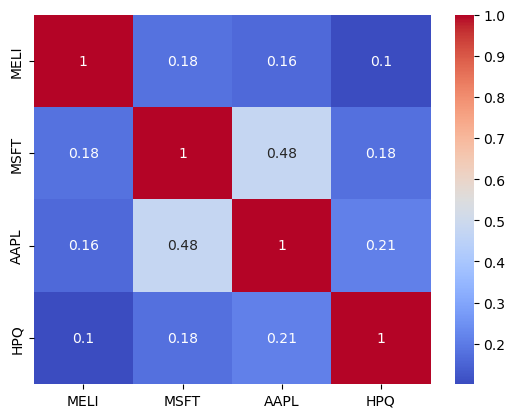

In [26]:
# Compute the correlation matrix
correlation = returns_of_companies.corr()
print(correlation)
# Plot the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')



# Correlation by hand

Example of how to apply step by step a correlation betwen two variables.

In [27]:
x = returns_of_companies['HPQ'].values
y = returns_of_companies['AAPL'].values

mean_x = np.mean(x)
mean_y = np.mean(y)

den_x = np.sqrt(np.sum((x - mean_x)**2))
den_y = np.sqrt(np.sum((y - mean_y)**2))

r_xy= np.sum((x - mean_x) * (y - mean_y)) / (den_x * den_y)

print(f"Pearson correlation coefficient between HPQ and Apple: {r_xy:3.2f}")

Pearson correlation coefficient between HPQ and Apple: 0.21
